# Missing values

Missing data is the absence of values in certain observations of a variable. Missing data is an unavoidable problem in most data sources and may have a significant impact on the conclusions that we derived from the data. 


## Why is the data missing?

The source of missing data can vary. These are just some examples:

- The value was forgotten, lost, or not stored properly.

- The value does not exist.

- The value can't be known or identified.

To give real-life examples, a person may choose not to complete all fields in a form if they are not mandatory. That would introduce missing data. Sometimes people do not want to disclose some information, for example, income, or they do not know the answers to the questions being asked. 

Sometimes the value for a certain variable does not exist. For example, in the variable "total debt as percentage of total income" (very common in financial data), if the person has no income, then the total percentage of 0 does not exist, and therefore it will be a missing value.

It's important to understand why data is missing, in other words, the mechanism of missing data. We may process the missing information differently depending on this mechanism. Furthermore, identifying the source of missing data allows us to take steps to regulate that source and reduce the amount of missing data as data collection progresses.


## Missing data mechanisms

There are 3 mechanisms that lead to missing data. Two of them involve missing data randomly and the third one involves a systematic loss of data.


### Missing Completely at Random, MCAR:

If the likelihood of a value being missing is the same for all observations, the variable is missing completely at random (MCAR). The data points that are missing are a random subset of the observations.

If data is MCAR, then disregarding observations with missing data would not bias the inferences made.


### Missing at Random, MAR: 

If the probability of an observation being missing depends on available information (i.e., other variables), then the observation is missing at random (MAR). There is a relationship between the likelihood of a value being missing and the observed data.

For example, if men are more likely to disclose their weight than women, weight is MAR. The weight information will be missing at random for the men and women who did not disclose their weight, but as men are more prone to disclose it, there will be more missing values for women than for men.

In this example, missing data points are no longer a random subset of the total observations.

If we decide to proceed with the variable with missing values (in this case weight), we might want to include the variable gender to control the bias in weight for the missing observations.


### Missing Not at Random, MNAR: 

If there is a mechanism or a reason why data is missing, then that data is missing not at random (MNAR). For example, if people failed to fill out a depression survey because of their depression, those data points would be missing not at random. The missing data occurs due to the depression. 

Depending on the mechanism by which missing values occur, we may choose different missing data imputation methods.

## In this Demo:

In this notebook we will:

- Detect and quantify missing values.

- Identify the mechanisms of missing data.

We will use the financial dataset from a peer-to-peer finance company and the Titanic dataset.

To obtain the datasets, visit the lecture **Download datasets** in **Section 1**.

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# To display all columns in the dataset.
pd.set_option('display.max_columns', None)

In [3]:
# Let's load the titanic dataset.
data = pd.read_csv('titanic.csv')

# Let's inspect the first 5 rows.
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In Python, the missing values are stored as NaN. See, for example, the first row for the variable Cabin.

In [4]:
# We can quantify the missing values using
# the isnull() method plus the sum() method:

data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

There are 263 missing values for Age, 1014 for Cabin and 2 for Embarked.

In [5]:
# We can also use the mean() method after isnull()
# to obtain the fraction of missing values:

data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In the variables Age there is 20% of data missing. 

There is 77 percent of data missing in the variable Cabin, in which the passenger was traveling.

There is 0.2 percent of data missing in the field Embarked (the port from which the passenger boarded the Titanic). 

## Mechanisms of Missing Data

### Missing data Not At Random (MNAR

The missing values of the variables **age** and **cabin**, were introduced systematically. For many of those who did not survive, their **age** or their **cabin** remains unknown. The people who survived could have been otherwise asked for that information.

Can we infer this by looking at the data?

If data is MNAR, we could expect a greater number of missing values for people who did not survive.

Let's have a look.

In [6]:
# Let's create a binary variable that indicates 
# if the value of cabin is missing.

data['cabin_null'] = np.where(data['cabin'].isnull(), 1, 0)

In [8]:
# Let's evaluate the percentage of missing values in
# cabin for the people who survived vs the non-survivors.

# The variable Survived takes the value 1 if the passenger
# survived, or 0 otherwise.

# Group data by Survived vs Non-Survived
# and find the percentage of NaN for Cabin.

data.groupby(['survived'])['cabin_null'].mean()

survived
0    0.873918
1    0.614000
Name: cabin_null, dtype: float64

In [9]:
# Another way of doing the above, with less lines
# of code:

data['cabin'].isnull().groupby(data['survived']).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

The percentage of missing values is higher for those who did not survive (87% vs 60% for survivors). This finding could support our hypothesis that the data is missing because after people died, the information could not be retrieved.

**Note**: to truly understand whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us make assumptions.

In [10]:
# Let's do the same for the variable age:

# First, we create a binary variable to indicate
# if a value is missing.

data['age_null'] = np.where(data['age'].isnull(), 1, 0)

# Then we look at the mean in survivors and non=survivors:
data.groupby(['survived'])['age_null'].mean()

survived
0    0.234858
1    0.146000
Name: age_null, dtype: float64

In [11]:
# The same with simpler code :)

data['age'].isnull().groupby(data['survived']).mean()

survived
0    0.234858
1    0.146000
Name: age, dtype: float64

We observe more missing data points for the people who did not survive. The analysis therefore suggests that there was a systematic loss of data: people who did not survive had more missing information. Presumably, the method chosen to gather the information contributes to the generation of this missing data.

### Missing data Completely At Random (MCAR)

In [12]:
# In the titanic dataset, there are also missing values
# for the variable Embarked.

# Let's have a look.

# Let's slice the dataframe to show only the observations
# with missing values for Embarked.

data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_null,age_null
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,0,0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",0,0


These 2 women were traveling together. Miss Icard was the maid of Mrs. Stone.

A priori, there does not seem to be an indication that the missing information in the variable "embarked" is dependent on any other variable, and the fact that these women survived means that they could have been asked for this information.

It is very likely the values were lost at the time of building the dataset.

If these values are MCAR, the likelihood of data missing for these two women is the same as the likelihood of data missing for any other person on the Titanic. Of course, this will be hard, if possible at all, to prove.

### Missing data at Random (MAR)

We will use the financial dataset from the peer-to-peer lending company.

We will look at the variables "employment" and "years in employment", both declared by the borrowers at the time of applying for a loan. 

In this example, data missing in employment are associated with data missing in time in employment.

In [13]:
# Let's load the dataset with just the 2
# variables.

data = pd.read_csv('loan.csv', usecols=['employment', 'time_employed'])

data.head()

,employment,time_employed
0,Teacher,<=5 years
1,Accountant,<=5 years
2,Statistician,<=5 years
3,Other,<=5 years
4,Bus driver,>5 years


In [14]:
# Let's check the percentage of missing data.

data.isnull().mean()

employment       0.0611
time_employed    0.0529
dtype: float64

Both variables have roughly the same percentage of missing observations.

In [20]:
# lLt's insptect the different employment types.

# Number of different employments.
print('Number of employments: {}'.format(data['employment'].nunique(dropna=False)))

# Examples of employments.
data['employment'].unique()

Number of employments: 12


array(['Teacher', 'Accountant', 'Statistician', 'Other', 'Bus driver',
       'Secretary', 'Software developer', 'Nurse', 'Taxi driver', nan,
       'Civil Servant', 'Dentist'], dtype=object)

Note the missing data along with the different employment values.

In [14]:
# Let's inspect the variable time employed.

data['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

The customer can't enter a value for employment time if they are not employed. They could be students, retired, self-employed, or something else. Note how these 2 variables are related to each other.

In [16]:
# Let's calculate the proportion of missing data 
# in time_employed variable when
# customers declared employment.

# Customers who declared employment
t = data[~data['employment'].isnull()]

# Percentage of missing data in time employed
t['time_employed'].isnull().mean()

0.0005325380764724678

In [17]:
# Let's do the same for those borrowers who did not 
# report employment.

# Customers who did not declare employment.
t = data[data['employment'].isnull()]

# Percentage of missing data in time employed.
t['time_employed'].isnull().mean()

0.8576104746317512

The number of borrowers who have reported occupation and have missing values in time_employed is minimal. Customers who did not report an occupation, on the other hand, mostly show missing values in the time_employed variable.

This further supports the hypothesis that the missing values in employment are related to the missing values in time_employed.

This is an example of MAR.

**That is all for this demonstration. I hope you enjoyed the notebook, and I'll see you in the next one.**

<hr/>

# Cardinality

The values of a categorical variable are selected from a group of categories, also called labels. For example, in the variable _gender_ the categories are male and female, whereas in the variable _city_ the labels could be London, Manchester, Brighton, and so on.

Categorical variables can contain different numbers of categories. The variable "gender" contains only 2 labels, but a variable like "city" or "postcode" can contain a huge number of labels.

The number of different labels is known as cardinality. A high number of labels within a variable is known as __high cardinality__.


## Is high cardinality a problem?

High cardinality poses the following challenges: 

- Variables with too many labels tend to dominate those with only a few labels, particularly in **decision tree-based** algorithms.

- High cardinality may introduce noise.

- Some of the labels may only be present in the training data set and not in the test set, so machine learning algorithms may over-fit to the training set.

- Some labels may appear only in the test set, leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

**Algorithms based on decision trees can be biased towards variables with high cardinality**.

Below is a demo about the effect of high cardinality on the performance of various machine learning algorithms.

## In this Demo:

- Learn how to quantify cardinality.
- See examples of high and low cardinality variables.
- Understand the effect of cardinality in train and test sets.
- Evaluate the effect of cardinality on machine learning model performance.

We will use the Titanic dataset.

- To download the dataset, please refer to the **Datasets** lecture in **Section 1** of the course.

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# The machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# To evaluate the models.
from sklearn.metrics import roc_auc_score

# To separate data into train and test.
from sklearn.model_selection import train_test_split

In [22]:
# lLt's load the titanic dataset.

data = pd.read_csv('titanic.csv')

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The categorical variables are Name, Sex, Ticket, Cabin and Embarked.

**Note** that Ticket and Cabin contain both letters and numbers, so they could be treated as Mixed Variables. In this demo, I will treat them as categorical.

In [23]:
# Let's inspect the cardinality: the number
# of different labels.

print('Number of categories in the variable Name: {}'.format(
    len(data.name.unique())))

print('Number of categories in the variable Gender: {}'.format(
    len(data.sex.unique())))

print('Number of categories in the variable Ticket: {}'.format(
    len(data.ticket.unique())))

print('Number of categories in the variable Cabin: {}'.format(
    len(data.cabin.unique())))

print('Number of categories in the variable Embarked: {}'.format(
    len(data.embarked.unique())))

print('Total number of passengers in the Titanic: {}'.format(len(data)))

Number of categories in the variable Name: 1307
Number of categories in the variable Gender: 2
Number of categories in the variable Ticket: 929
Number of categories in the variable Cabin: 182
Number of categories in the variable Embarked: 4
Total number of passengers in the Titanic: 1309


While the variable Sex contains only 2 categories and the variable Embarked 4 (low cardinality), the variables Ticket, Name, and Cabin, as expected, contain a huge number of different labels (high cardinality).

To demonstrate the effect of high cardinality on train and test sets and on machine learning performance, I will work with the variable cabin. I will create a new variable with reduced cardinality.

In [24]:
# let's explore the values of Cabin.

# We know from the previous cell that there are 148
# different cabins, therefore the variable
# is highly cardinal.

data.cabin.unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


Let's reduce the cardinality of the variable. How? Instead of using the entire value (letter + number), I will only use the first letter.

***Rationale***: the first letter indicates the deck on which the cabin was located, indicating both social class status and proximity to the Titanic's surface. Both are known to improve the probability of survival.

In [25]:
# Let's capture the first letter of cabin.

data['Cabin_reduced'] = data['cabin'].astype(str).str[0]

data[['cabin', 'Cabin_reduced']].head()

,cabin,Cabin_reduced
0,B5,B
1,C22,C
2,C22,C
3,C22,C
4,C22,C


In [26]:
print('Number of categories in the variable Cabin: {}'.format(
    len(data.cabin.unique())))

print('Number of categories in the variable Cabin reduced: {}'.format(
    len(data.Cabin_reduced.unique())))

Number of categories in the variable Cabin: 182
Number of categories in the variable Cabin reduced: 9


We reduced the number of different labels from 182 to 9.

In [27]:
# Let's separate the data into training and testing sets.

use_cols = ['cabin', 'Cabin_reduced', 'sex']

# This functions is from Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(
    data[use_cols], 
    data['survived'],  
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

## Uneven distribution of categories

When a variable is highly cardinal, some categories appear only on the training set, and others only on the testing set. If present only in the training set, they may cause over-fitting. If present only on the testing set, the machine learning model will not know how to handle them, as they were not seen during training.

In [28]:
# Labels present only in the training set:

unique_to_train_set = [
    x for x in X_train.cabin.unique() if x not in X_test.cabin.unique()
]

len(unique_to_train_set)

113

There are 113 Cabins only present in the training set.

In [29]:
# Labels present only in the test set.

unique_to_test_set = [
    x for x in X_test.cabin.unique() if x not in X_train.cabin.unique()
]

len(unique_to_test_set)

36

Variables with high cardinality have categories present either only in the training set, or only in the testing set. This will cause problems at the time of training (over-fitting) and scoring of new data (how will the model deal with unseen categories?).

This problem can be mitigated by reducing the cardinality of the variable. Let's do that.

In [30]:
# Labels present only in the training set
# for Cabin with reduced cardinality.

unique_to_train_set = [
    x for x in X_train['Cabin_reduced'].unique()
    if x not in X_test['Cabin_reduced'].unique()
]

len(unique_to_train_set)

1

In [31]:
# Labels present only in the test set
# for Cabin with reduced cardinality.

unique_to_test_set = [
    x for x in X_test['Cabin_reduced'].unique()
    if x not in X_train['Cabin_reduced'].unique()
]

len(unique_to_test_set)

0

By reducing the cardinality, there is now only 1 label in the training set that is not present in the test set. There is no label in the test set that is not in the training set either.

## The impact of cardinality on the performance of machine learning models

In order to evaluate the effect of categorical variables in machine learning models, I will quickly replace the categories with numbers.

In [32]:
# Let's re-map Cabin into numbers so we can use it to train ML models

# I will replace each cabin by a number
# to quickly demonstrate the effect of
# labels on machine learning algorithms.

##############
# Note: this is neither the only nor the best
# way to encode categorical variables into numbers.
# There is more on encoding techniques in the section
# "Encoding categorical variales".
##############

cabin_dict = {k: i for i, k in enumerate(X_train.cabin.unique(), 0)}
cabin_dict

{nan: 0,
 'E36': 1,
 'C68': 2,
 'E24': 3,
 'C22': 4,
 'D38': 5,
 'B50': 6,
 'A24': 7,
 'C111': 8,
 'F': 9,
 'C6': 10,
 'C87': 11,
 'E8': 12,
 'B45': 13,
 'C93': 14,
 'D28': 15,
 'D36': 16,
 'C125': 17,
 'B35': 18,
 'T': 19,
 'B73': 20,
 'B57': 21,
 'A26': 22,
 'A18': 23,
 'B96': 24,
 'G6': 25,
 'C78': 26,
 'C101': 27,
 'D9': 28,
 'D33': 29,
 'C128': 30,
 'E50': 31,
 'B26': 32,
 'B69': 33,
 'E121': 34,
 'C123': 35,
 'B94': 36,
 'A34': 37,
 'D': 38,
 'C39': 39,
 'D43': 40,
 'E31': 41,
 'B5': 42,
 'D17': 43,
 'F33': 44,
 'E44': 45,
 'D7': 46,
 'A21': 47,
 'D34': 48,
 'A29': 49,
 'D35': 50,
 'A11': 51,
 'B51': 52,
 'D46': 53,
 'E60': 54,
 'C30': 55,
 'D26': 56,
 'E68': 57,
 'A9': 58,
 'B71': 59,
 'D37': 60,
 'F2': 61,
 'C55': 62,
 'C89': 63,
 'C124': 64,
 'C23': 65,
 'C126': 66,
 'E49': 67,
 'E46': 68,
 'D19': 69,
 'B58': 70,
 'C82': 71,
 'B52': 72,
 'C92': 73,
 'E45': 74,
 'C65': 75,
 'E25': 76,
 'B3': 77,
 'D40': 78,
 'C91': 79,
 'B102': 80,
 'B61': 81,
 'A20': 82,
 'B36': 83,
 'C7': 84,

In [33]:
# Replace the labels in Cabin with the dictionary
# we just created.

X_train.loc[:, 'Cabin_mapped'] = X_train.loc[:, 'cabin'].map(cabin_dict)
X_test.loc[:, 'Cabin_mapped'] = X_test.loc[:, 'cabin'].map(cabin_dict)

X_train[['Cabin_mapped', 'cabin']].head(10)

,Cabin_mapped,cabin
501,0,NaN
588,0,NaN
402,0,NaN
1193,0,NaN
686,0,NaN
971,0,NaN
117,1,E36
540,0,NaN
294,2,C68
261,3,E24


Note how NaN takes the value 0, E36 takes the value 1, C68 takes the value 2, and so on.

In [34]:
# Now I will replace the letters in the reduced cabin variable
# using the same procedure.

# Create replacement dictionary.
cabin_dict = {k: i for i, k in enumerate(X_train['Cabin_reduced'].unique(), 0)}

# Replace labels by numbers using dictionary.
X_train.loc[:, 'Cabin_reduced'] = X_train.loc[:, 'Cabin_reduced'].map(
    cabin_dict)
X_test.loc[:, 'Cabin_reduced'] = X_test.loc[:, 'Cabin_reduced'].map(cabin_dict)

X_train[['Cabin_reduced', 'cabin']].head(20)

,Cabin_reduced,cabin
501,0,NaN
588,0,NaN
402,0,NaN
1193,0,NaN
686,0,NaN
971,0,NaN
117,1,E36
540,0,NaN
294,2,C68
261,1,E24


We see now that E36 and E24 take the same number, 1, because we are capturing only the letter. They both start with E.

In [35]:
# Re-map the categorical variable Sex into numbers.

X_train.loc[:, 'sex'] = X_train.loc[:, 'sex'].map({'male': 0, 'female': 1})
X_test.loc[:, 'sex'] = X_test.loc[:, 'sex'].map({'male': 0, 'female': 1})

X_train.sex.head()

501     1
588     1
402     1
1193    0
686     1
Name: sex, dtype: int64

In [36]:
# Check if there are missing values in these variables.

X_train[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     0
Cabin_reduced    0
sex              0
dtype: int64

In [37]:
X_test[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     41
Cabin_reduced     0
sex               0
dtype: int64

In the test set, there are now 41 missing values for the highly cardinal variable. These were introduced when encoding the categories into numbers. 

How? 

Many categories exist only in the test set. Thus, when we created our encoding dictionary using only the train set, we did not generate a number to replace those labels present only in the test set. As a consequence, they were encoded as NaN. We will see in future notebooks how to tackle this problem. For now, I will fill in those missing values with 0.

In [38]:
# Let's check the number of different 
# categories in the encoded variables.

len(X_train.Cabin_mapped.unique()), len(X_train.Cabin_reduced.unique())

(147, 9)

From the above we note immediately that from the original 182 cabins in the dataset, only 147 are present in the training set. We also see how we reduced the number of different categories to just 9 in our previous step.

Let's go ahead and evaluate the effect of cardinality in machine learning algorithms.

## Random Forests

In [39]:
# Model trained with data with high cardinality.

# The model.
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = rf.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.853790650048556
Test set
Random Forests roc-auc: 0.7691361097284443


The performance of the Random Forests on the training set is quite superior to its performance on the test set. This indicates that the model is over-fitting, which means that it does a great job of predicting the outcome on the dataset it was trained on, but it lacks the power to generalise the prediction to unseen data.

In [40]:
# Model trained with data with low cardinality.

# The model.
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = rf.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_reduced', 'sex']])

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8163420365403872
Test set
Random Forests roc-auc: 0.8017670482827277


Note that the Random Forests no longer over-fit to the training set. The model is much better at generalising the predictions (compare the ROC-AUC of this model vs the ROC-AUC of the previous model: : 0.81 vs 0.80).

**I would like to point out, that likely we can overcome the effect of high cardinality by adjusting the hyper-parameters of the random forests. That goes beyond the scope of this course. Here, I want to show you that given a model with identical hyper-parameters, high cardinality may cause the model to over-fit**.

## AdaBoost

In [41]:
# Model trained with data with high cardinality.

# The model.
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set
pred_train = ada.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = ada.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Adaboost roc-auc: 0.8296861713101102
Test set
Adaboost roc-auc: 0.7604391350035948


In [42]:
# Model trained with data with fewer categories.

# The model.
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = ada.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = ada.predict_proba(X_test[['Cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Adaboost roc-auc: 0.8161256723642566
Test set
Adaboost roc-auc: 0.8001078480172557


Similarly, Adaboost trained with the variable with high cardinality overfits to the train set. Adaboost trained with the low cardinal variable does not overfit.

In addition, trainind AdaBoost with data with less categories in Cabin, returns a) a simpler model and, b) should a different category in the test set appear, by taking just the front letter of cabin, the ML model will know how to handle it because, most likely, the value was seen during training.

## Logistic Regression

In [43]:
# Model trained with data with high cardinality.

# The model.
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model.
logit.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = logit.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8133909298124677
Test set
Logistic regression roc-auc: 0.7750815773463858


In [44]:
# Model trained with data with fewer categories.

# The model.
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model.
logit.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = logit.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8123468468695123
Test set
Logistic regression roc-auc: 0.8008268347989602


We can draw the same conclusions for Logistic Regression: reducing the cardinality improves the performance of the algorithm.

## Gradient Boosted Classifier

In [45]:
# Model trained with data with high cardinality.

# The model.
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)

# Train the model.
gbc.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set
pred_train = gbc.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = gbc.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.862631390919749
Test set
Gradient Boosted Trees roc-auc: 0.7733117637298823


In [46]:
# Model trained with data with fewer categories.

# call the model
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)

# train the model
gbc.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# make predictions on train and test set
pred_train = gbc.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = gbc.predict_proba(X_test[['Cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.816719415917359
Test set
Gradient Boosted Trees roc-auc: 0.8015181682429069


Gradient Boosted trees are overfit to the training set when using a variable with high cardinality. This was expected as tree-based methods tend to be biased to variables with plenty of categories.

<hr/>

# Rare Labels


Categorical variables are those whose values are selected from a group of categories, also called labels. Labels may have different frequencies. Some categories appear a lot in the dataset, some others appear only in a small number of observations.

For example, in a dataset with information about loan applicants where one of the variables is "city" where the applicant lives, cities like "New York" may appear a lot in the data because New York has a huge population, whereas smaller towns like "Leavenworth" will appear only on a few occasions (population ~2000 people), because the population there is very small. A borrower is more likely to live in New York than in any other city because it has a bigger population.

Categorical variables may contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only rarely.


### Is label frequency a problem?

Rare values can add a lot of information or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have almost no impact individually.

The same occurs in real-life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact collectively.

More specifically,

- Rare categories can cause over-fitting, particularly in tree-based methods.

- Infrequent labels may add noise, which could cause over-fitting.

- Rare labels may be present only in training set, therefore causing over-fitting.

- Rare labels may appear only in the test set. Thus, the ML model will not know how to evaluate it. 


**Note** Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we should not to ignore it.

## In this Demo:

We will:

- Learn to identify rare labels .
- Understand the impact of rare labels on the conclusions we derive from the data
- Understand how they may be distributed between training and testing sets.

We will use the House Sale Price dataset.

- To download the dataset please visit the lecture **Datasets** in **Section 1** of the course.

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# To separate data intro train and test sets.
from sklearn.model_selection import train_test_split

In [50]:
# Let's load the dataset with the variables
# we need for this demo.

# Variable definitions:

# Neighborhood: Physical locations within Ames city limits
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [51]:
# Let's look at the different number of labels
# in each variable (cardinality).

# These are the categorical variables.
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

variable:  Neighborhood  number of labels:  25
variable:  Exterior1st  number of labels:  15
variable:  Exterior2nd  number of labels:  16
total houses:  1460


The variable 'Neighborhood' shows 25 different values, 'Exterior1st' shows 15 different categories, and 'Exterior2nd' shows 16 different categories.

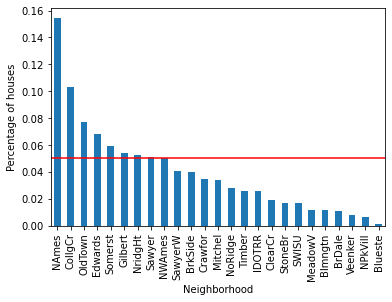

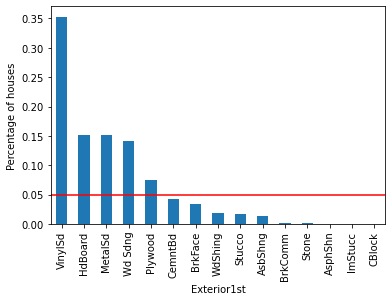

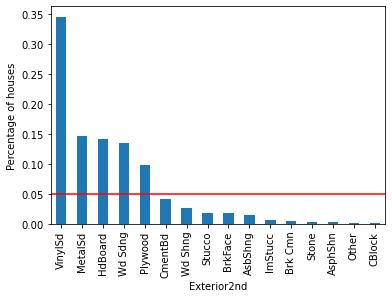

In [52]:
# Let's plot the category frequency.
# That is, the percentage of houses with each label.

total_houses = len(data)

# For each categorical variable
for col in cat_cols:

    # Count the number of houses per category
    # and divide by total houses.

    # That is, the percentage of houses per category.

    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # Make plot with these percentages.
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

Some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or **Rare Values** and could cause over-fitting.

## Mean Sale Price in rare labels

I want to understand the mean Sale Price per category.

In [54]:
# The following function calculates:

# 1) the percentage of houses per category.
# 2) the mean SalePrice per category.


def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [55]:
# Now we use the function for the variable 'Neighborhood'.

temp_df = calculate_mean_target_per_category(data, 'Neighborhood')

temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


The dataframe contains the percentage of houses that display each label in Neighborhood, and their mean SalePrice. For example, ~15% of houses are in "NAmes" and their mean SalePrice is 145847.

In [56]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# Sale Price and the categories.

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

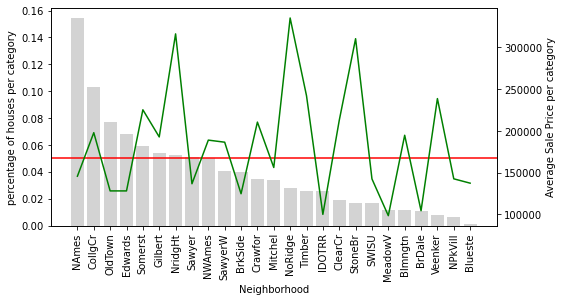

In [57]:
plot_categories(temp_df, 'Neighborhood')

Houses in 'NridgHt' sell at a high price, whereas houses in 'Sawyer' tend to be cheaper.

Houses in StoneBr have on average a high SalePrice, above 300k. However, less than 5% of houses are from StoneBr.

Why is this important? Well, if we only have information for few houses, we could be under or over-estimating the effect of StoneBr on the SalePrice.

How confident can we be to conclude that most houses in StoneBr cost around 300k, when we only have a few houses to learn from?

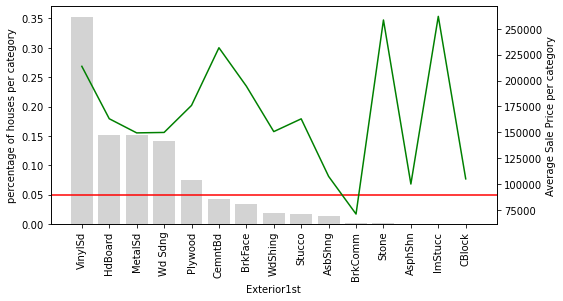

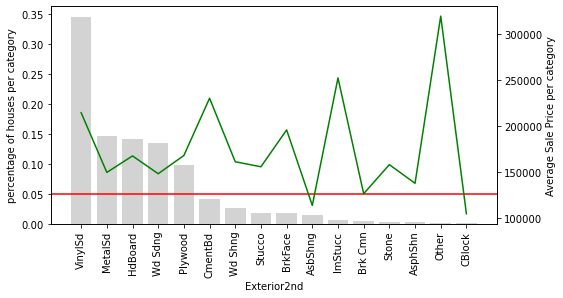

In [58]:
# Let's plot the remaining categorical variables.

for col in cat_cols:
    
    # We plotted this variable already.
    # So I skip it.
    if col !='Neighborhood':
        
        # Re-using the functions I created.
        temp_df = calculate_mean_target_per_category(data, col)
        plot_categories(temp_df, col)

Most of the categories in the variable "Exterior2nd" are present in less than 5% of houses. In addition, the "sale price" varies a lot across those rare categories. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can't be sure whether they have a true impact on the house price. Because we only have information for a few houses, we may be underestimating or overestimating their impact.

**Note:** This plot would bring more value if we plotted the errors of the mean sale price. It would give us an idea of how much the mean value of the target varies within each label. Why don't you go ahead and add the standard deviation to the plot?

## Grouping rare labels

A common way of handling rare values is to group them under an umbrella category called 'Rare' or 'Other'. Like this, we are able to understand their "collective" impact on the target.

In [59]:
# I will replace all labels that appear in less than 5%
# of the houses by the label 'rare'.

def group_rare_labels(df, var):

    total_houses = len(df)

    # First, I calculate the % of houses per category.
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # Then, I create a dictionary to replace the rare labels with the
    # string 'rare' (for categories present in less than 5% of houses).

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # Now, I replace the rare categories.
    tmp = df[var].map(grouping_dict)

    return tmp

In [60]:
# Group rare labels in Neighborhood.

data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


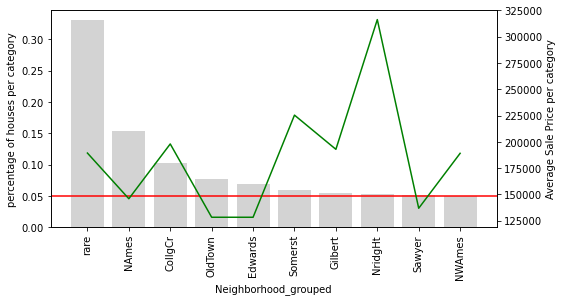

In [61]:
# Let's plot Neighborhood with the grouped categories.

temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the Sale price.

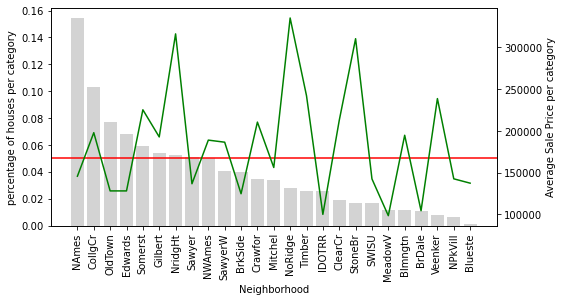

In [62]:
# Let's plot the original Neighborhood for comparison.

temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average sale price for all the infrequent labels.

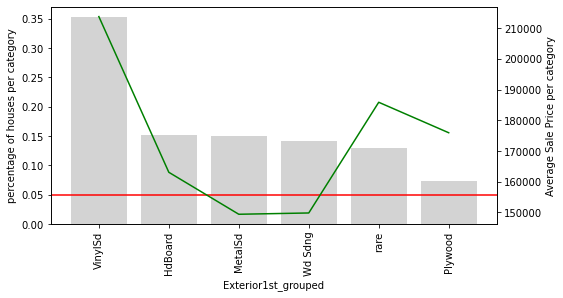

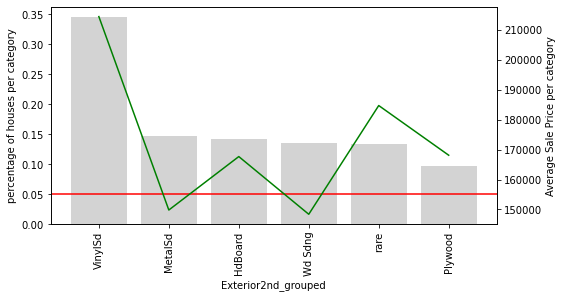

In [63]:
# Let's group and plot the remaining categorical variables.

for col in cat_cols[1:]:
        
    # Re-using the functions I created.
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Note how interesting: In the variable Exterior1st, houses with rare values are on average more expensive (except for those with VinySd). The same is true for Exterior2nd. The rare categories seem to have something in common.

**Note:** Ideally, we would want to plot the standard deviation or inter-quantile range for the sale price to get a better idea of how the categories affect the house price.

## Uneven distribution between train and test sets

Similarly to highly cardinal variables, rare labels often appear only on the training set or only on the testing set. If only in the training set, they may lead to over-fitting. If only in the testing set, machine learning models will not know how to handle them because they were not seen during training.

In [64]:
# Let's separate into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [65]:
# Let's find labels present only in the training set.

unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]

print(unique_to_train_set)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']


There are 4 categories present only in the train.

In [66]:
# Let's find labels present only in the test set.

unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]

print(unique_to_test_set)

['AsphShn']


In this case, there is 1 rare value present in the test set only.

<hr/>

# Linear Model Assumptions

Linear regression assumptions are:

- **Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

- **No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors. 

- **Normally distributed errors**: the residuals are random and normally distributed with a mean of 0.

- **Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

Examples of linear models are:

- Linear and Logistic Regression

- Linear Discriminant Analysis (LDA)

**Failure to meet one or more of the model assumptions could end up in a poor model performance**.

If the assumptions are not met, we can:

- Use a different, no-linear model to predict the outcome from the variables.

- Transform the input variables so that they meet the assumptions.

## Performance of a linear model

To determine if a linear model fits the data well, we evaluate the residuals. The residuals should have a normal distribution with the mean centered at zero, and should be homoscedastic. If this is true, we can be fairly confident that the model is doing a good job.

The normal distribution can be assessed by Q-Q plots. Homoscedasticity can be assessed by residual plots.

We can also examine if there is a linear relationship between the predictors and the target with scatter-plots and residuals plots, and assess multi-colinearity with correlation matrices.

## When model assumptions are not met

Sometimes we can transform variables so that they meet the model assumptions. We normally do one of two things:

- Mathematical transformation of the variables

- Discretisation

**I will cover mathematical transformations and discretisation in later sections of the course**. 

## In this demo...

We will:

- Train a linear model to predict a target from 3 predictor variables

- Evaluate if the model is accurate by examining the residuals

- Determine if the residuals are normally distributed

- Evaluate homoscedasticity

- Transform the data and see how this improves model performance

- Examine correlation and linear relationships between variables and target

In [72]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [73]:
# load the the Boston house price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [74]:
# This is the information about the boston house prince dataset,
# in case you want to get familiar with the variables before 
# continuing with the notebook.

# The aim is to predict the "Median house value (price)"
# which is the MEDV column.

# We have variables with characteristics about
# the homes and the neighborhoods.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Linear model 

In [75]:
# To train and evaluate a model, let's first split the data into
# train and test data, using 3 variables:
# LSTAT, RM and CRIM

# Let's separate the data into training and testing sets
# using a sklearn function.

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [76]:
# Let's scale the features.
# This is a normal procedure for linear models.
# I will explain this later in the course.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [77]:
# Let's train a linear model.

# Instantiate a lineear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.20006295308441



## Residuals

Residuals are the difference between the observed value and the predicted value.

In [78]:
# Calculate the residuals.

error = y_test - pred

## Residuals distribution

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

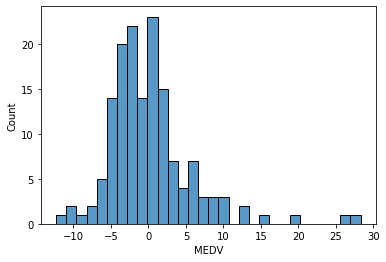

In [79]:
# We make a histogram to see if the residuals
# are normally distributed with mean value at 0.

sns.histplot(error, bins=30)

The residuals show a "fairly" normal distribution centered at 0. Not perfect, though. By visual inspection, there is some skew towards the left, with a few higher values towards the right of the distribution.

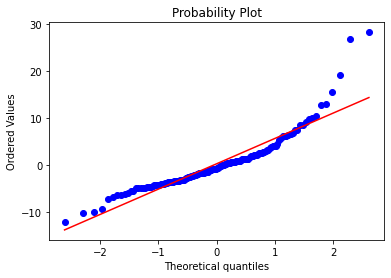

In [80]:
# We can also analyse the residuals distribution with 
# Q-Q plots. If the residuals are normally distributed
# the dots should adjust to the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot, we see that the residuals deviate from the red line towards the right of the distribution; thus, they are not normally distributed.

## Homoscedasticity

Homoscedasticity implies that the variance of the residual terms should be constant at each level of the predictor variable(s).So we need to plot the residuals against the variables.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the "noise" in the relationship between the independent variables and the target) is the same across all values of the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs. each of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot

- Levene’s test

- Barlett’s test

- Goldfeld-Quandt Test

But those escape the scope of this course. So for this demo, I will focus on residual plot analysis.

Text(0, 0.5, 'Residuals')

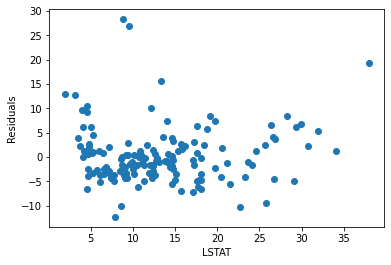

In [81]:
# Plot the residuals vs. one of the independent
# variables, LSTAT in this case.

plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

Text(0, 0.5, 'Residuals')

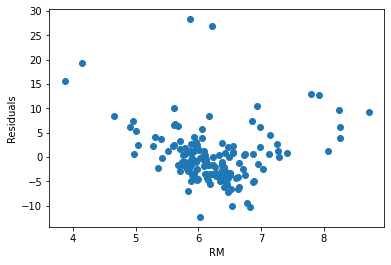

In [82]:
# Let's plot the residuals vs. RM.

plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

Text(0, 0.5, 'Residuals')

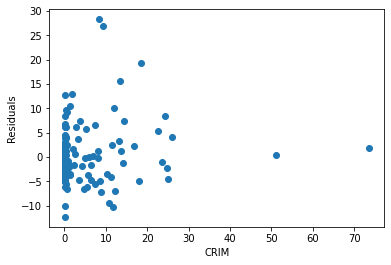

In [83]:
# Plot the residuals vs. one of the independent
# variables, CRIM in this case.

plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

Most values of CRIM are skewed towards the left, so it is hard to say if the residuals show the same variance for all values of CRIM, because we have very few data points for CRIM when its values are high.

## Residual analysis with Yellowbrick

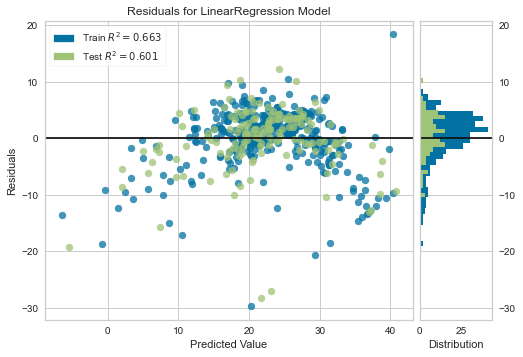

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [84]:
# I want to introduce Yellobrick,
# a library for visualisation of machine learning model 
# performance.

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook.

# Yellowbrick allows you to visualise the residuals of the
# models after fitting a linear regression.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

On the right, we see the distribution of the residuals in the train and test sets. The residuals are not centered at 0.

On the left, we see the residuals vs. the predictions. The residuals' variance is not constant, i.e., they are not homoscedastic. Towards the extremes of the prediction values, the model is under-estimating the outcome (most residuals are negative). On the contrary, towards the center of the prediction values, the model is over-estimating the outcome.

## Improving model fit

We will use the Box-Cox transformation on the numerical variables (more on this in a later section).

In [85]:
import scipy.stats as stats

# Apply the box-cox transformation to the variables.
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# Let's separate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [86]:
# Let's scale the features.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [87]:
# Model trained with the transformed variables.

# The model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions and calculate the mean squared
# error over the train set.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions and calculate the mean squared
# error over the test set.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



## Residuals

In [88]:
# Calculate the residuals.

error = y_test - pred

## Residual distribution

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

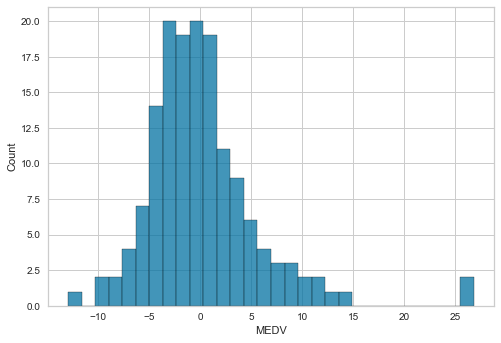

In [89]:
# We make a histogram to analyse the residuals'
# distribution.

sns.histplot(error, bins=30)

The residuals seem to be normally distributed and centered at 0.

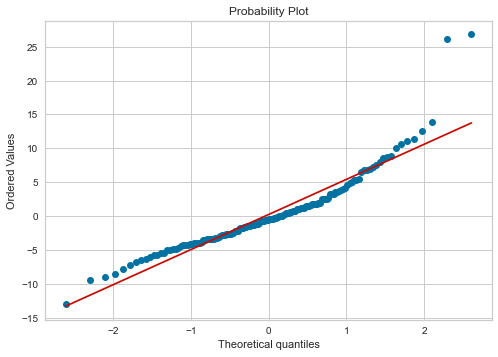

In [90]:
# We can also analise the residuals distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should follow the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

The residuals are normally distributed after transforming our variables.

## Yellowbrick

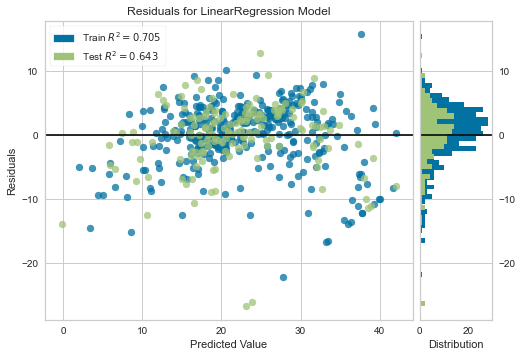

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [91]:
# Let's now do the analysis with yellowbrick.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

## Other model assumptions

To understand the relationships between predictor variables and the outcome, and predictor variables with themselves, we can evaluate the linear relationships and co-linearity.

First, I will show how the plots should look like using a toy dataframe with a variable that is linearly related to the target.

In [92]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y.

# This will provide the expected plots
# i.e., how the plots should look like if the
# assumptions are met.

np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear relationship

We evaluate the linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

### Scatter plots

Text(0.5, 22.960000000000022, 'Independent variable')

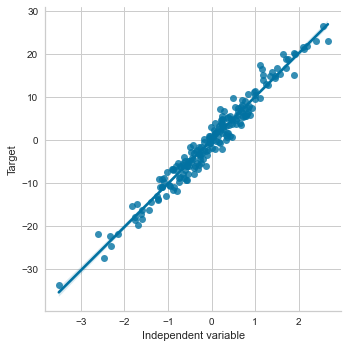

In [93]:
# With the toy data

# This is how the plot looks like when
# there is a linear relationship.

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y.

plt.ylabel('Target')
plt.xlabel('Independent variable')

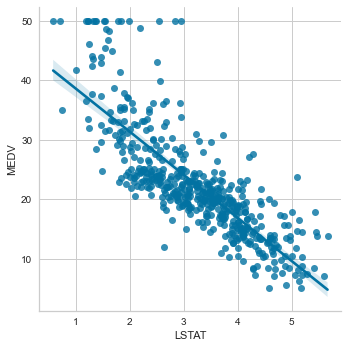

In [94]:
# Now we make a scatter plot for the boston
# house price dataset.
# (remember that we transformed the variables already)

# We plot LSTAT (% lower status of the population)
# vs. MEDV (median value of the house).

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

The relationship between LSTAT and MEDV is fairly linear apart from a few values around the minimal values of LSTAT, towards the top left part of the plot.

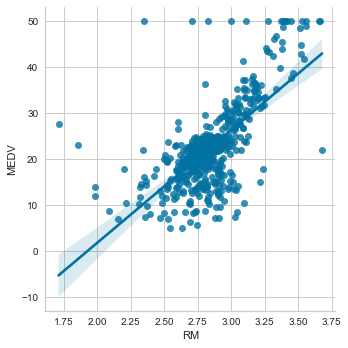

In [95]:
# Now we plot RM (average number of rooms per dwelling)
# vs. MEDV (median value of the house).

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

The relationship between the target and the transformed RM is not linear. We could consider, transforming this variable further, removing the variable from the model, or using a non-linear model to predict MEDV from RM.

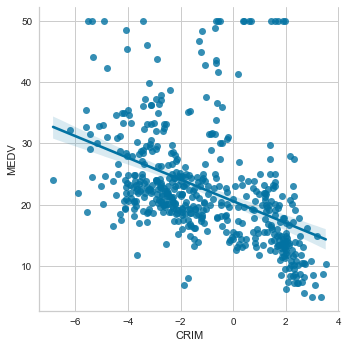

In [96]:
# Now we plot CRIM (per capita crime rate by town)
# vs. MEDV (median value of the house).

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

## Residual plots

Another thing that we can do to determine whether there is a linear relationship between the variable and the target is to evaluate the distribution of the errors, or residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) Train a linear regression model using the desired variables (X).

2) Obtain the predictions .

3) Calculate the error (the difference between the true and predicted house prices).

4) Examine the error distribution.

If the house price, in this case, MEDV, is linearly explained by the variables, then the error should be random with a normal distribution centered at 0.

We will first evaluate the toy dataset so that we become familiar with what the plots should look like. Then we will evaluate LSTAT and finally, we will transform LSTAT to see how the transformation affects the residuals and the linear fit.

**Note**

This is a bit of an over-kill if what we are trying to do is predict an outcome from predictor variables. However, you may want to do this to better understand the relationships between your variables and the target.

Text(0, 0.5, 'Real value')

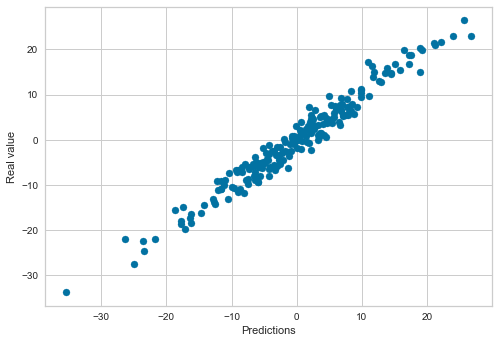

In [97]:
# Toy dataset.

# Step 1: train a linear model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# Step 2: obtain the predictions.
pred = linreg.predict(toy_df['x'].to_frame())

# Step 3: calculate the residuals.
error = toy_df['y'] - pred

# Plot predicted vs real values.
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

The model makes good predictions. The predictions are quite aligned with the real value of the target.

Text(0.5, 0, 'Independent variable x')

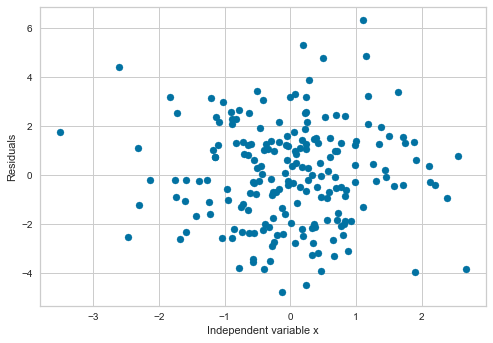

In [98]:
# Step 4: examine the distribution of the errors.

# Residuals plot.
# If the relationship is linear, the residuals should be
# random, centered at zero, and follow a normal distribution.

# We plot the error terms vs. the independent variable x.

plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

The errors are distributed around 0, as expected.

Text(0.5, 0, 'Residuals')

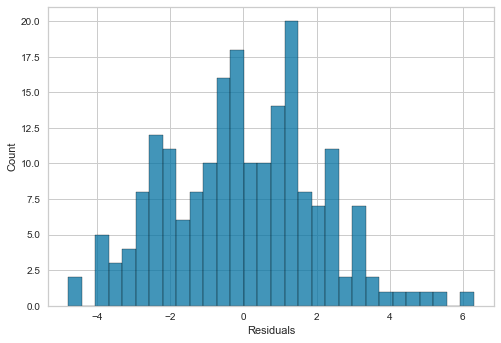

In [99]:
# Step 4: examine the distribution of the errors.

# Plot a histogram of the residuals.
# They should show a gaussian distribution
# centered around 0.

sns.histplot(error, bins=30)
plt.xlabel('Residuals')

The errors show a Gaussian distribution centered around 0. So the variable meets the assumptions of the model.

Let's do the same for LSTAT (remember that we already transformed this variable).

Text(0, 0.5, 'MEDV')

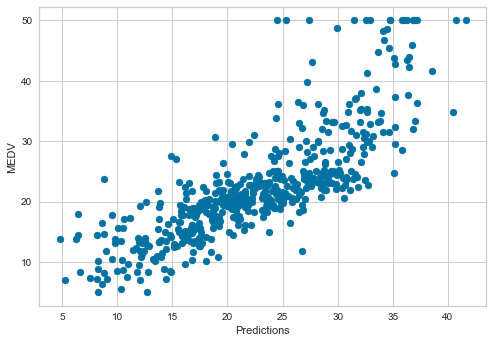

In [100]:
# The linear model from sklearn.
linreg = LinearRegression()

# Fit the model.
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# Make the predictions.
pred = linreg.predict(boston['LSTAT'].to_frame())

# Calculate the residuals.
error = boston['MEDV'] - pred

# Plot predicted vs real values.
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Most of the predictions are close to the real values. However, the model does not predict very well towards the highest house prices. For high house prices, the model under-estimates the price.

Text(0.5, 0, 'LSTAT')

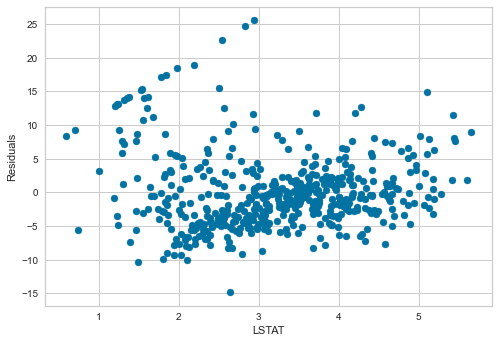

In [101]:
# Residuals plot.

# If the relationship is linear, the residuals should be
# random, centered at zero, and follow a normal distribution.

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

The residuals are not really centered at zero. The errors are not homogeneously distributed across the values of LSTAT. Low and high values of LSTAT show higher errors. 

The relationship could be improved.

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

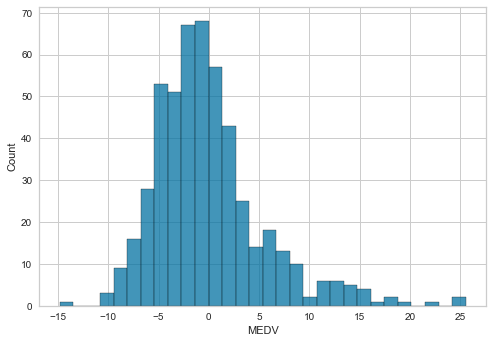

In [102]:
# Plot a histogram of the residuals.
# They should follow a gaussian distribution.

sns.histplot(error, bins=30)

The residuals are not centered around zero, and the distribution is not normal.

## Multicolinearity

To determine co-linearity, we evaluate the correlation of independent variables.

In [103]:
# Capture features in a list.

features = boston_dataset.feature_names

<AxesSubplot:>

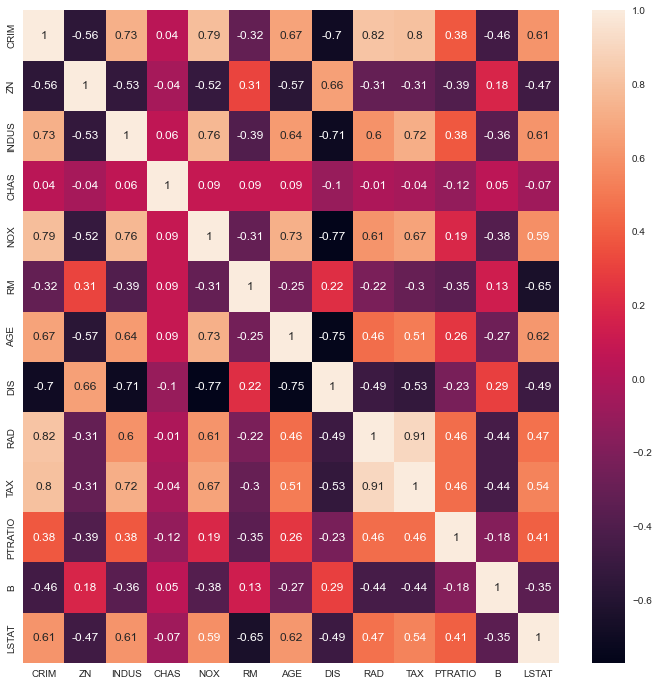

In [104]:
# We calculate the correlations using pandas corr()
# and we round the values to 2 decimals.
correlation_matrix = boston[features].corr().round(2)

# Plot the correlation matrix usng seaborn.
# We use annot = True to print the correlation values
# inside the squares.

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

On the x and y axis of the heatmap, we see the variables of the Boston House dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These two variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

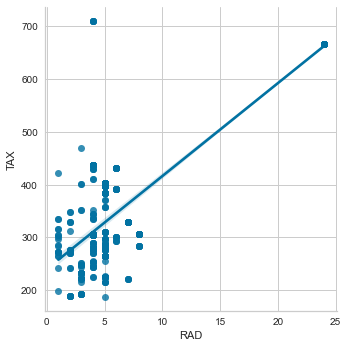

In [105]:
# Correlation between RAD (index of accessibility to radial highways)
# and TAX (full-value property-tax rate per $10,000).

sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

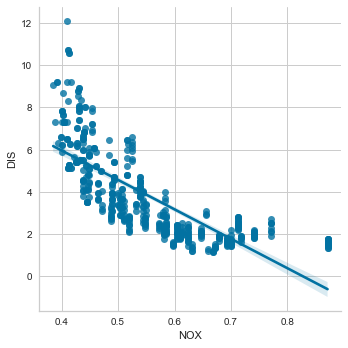

In [106]:
# Correlation between NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres).

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

The correlation, or co-linearity between NOX and DIS, is quite obvious in the scatter plot. So these variables are violating the assumption of no multi co-linearity.

We could remove one of the variables before training the linear model.

<hr/>

# Outliers

An outlier is a data point that is significantly different from the remaining data.

"An outlier is an observation that deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

## Should outliers be removed?

Depending on the context, outliers either deserve special attention or should be ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card might be a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So, in instances like these, it is useful to look for and investigate further the outlier values.

If outliers are, however, introduced by mechanical or measurement error, it is a good idea to remove these outliers before training the model. Why? because some algorithms are sensitive to outliers. 

## Machine learning models and outliers

Some machine learning models are sensitive to outliers. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on them, thus producing a model with poor generalisation.

Linear models, in particular linear regression, can also be sensitive to outliers.

Decision trees-based models are robust to outliers. Decision trees make decisions by asking if variable x is >= than a certain value, and therefore the outlier will fall on each side of the equation, but it will be treated similarly to non-outlier values.

A research article suggests that neural networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (> 15% as suggested in the article), then they are no longer outliers, but rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture at the end of this section of the course.

## Identifying outliers

Outlier analysis and anomaly detection is a huge field of research devoted to optimising methods and creating new algorithms to reliably identify outliers. There are plenty of ways to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we want to focus on, for example, fraudulent credit card activity.

In this course, however, we will focus on identifying outliers introduced by mechanical or measurement error. For this course, we won't be interested in the outliers per se, we just want to treat them before training our models.

Here, I will show you how to identify outliers. In later sections of the course we will learn how to preprocess them before training machine learning models.

## Extreme Value Analysis

The most basic form of outlier detection is **Extreme Value Analysis** of 1-dimensional data. The key to this method is to determine the statistical tails of the underlying distribution of the variable and then find the values that sit at the very end of the distribution.

If the variable is normally distributed (Gaussian), then the values that lie outside the mean, plus or minus 3 times the standard deviation of the variable, are considered outliers.

- outliers = mean +/- 3* std.

If the variable is skewed, a general approach is to calculate the quantiles, and then the inter-quartile range (IQR):

- IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)


## Datasets for this demo: 

We will use the House Prices and Titanic datasets.

- To download the datasets please refer to the lecture **Datasets** in **Section 1** of the course.

We will also use the Boston house prices dataset from Scikit-learn:

### Boston house prices dataset

In [107]:
# Print information for boston dataset.

from sklearn.datasets import load_boston

print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## In this demo

We will:

- Identify outliers using Extreme Value Analysis in Normally distributed variables.
- Identify outliers using Extreme Value Analysis in skewed variables.

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

In [109]:
# Load the Boston House prices dataset from sklearn
boston_dataset = load_boston()

# Create a dataframe with the independent variables.
# I will use only 3 of the total variables for this demo.

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]


boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [111]:
# Load the titanic dataset.

titanic = pd.read_csv('titanic.csv',
                      usecols=['age', 'fare'])

# The variables age and fare have missing values.
# I will remove them for this demo.
titanic.dropna(subset=['age', 'fare'], inplace=True)

titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


## Variable distribution

In normally distributed variables, outliers are those values that lie beyond the mean, plus or minus 3 times the standard deviation. If the variables are skewed, however, we find outliers using the inter-quantile range. In order to decide which method to use to detect outliers, we first need to know the distribution of the variable.

We can use histograms and Q-Q plots to determine if the variable is normally distributed. We can also use boxplots to directly visualise the outliers. Boxplots are a standard way of displaying the distribution of a variable, utilising the first quartile, the median, the third quartile, and the whiskers.

Looking at a boxplot, you can easily identify:

- The median, indicated by the line within the box.

- The inter-quantile range (IQR), the box itself.

- The quantiles, the 25th (Q1) is the lower and the 75th (Q3) the upper end of the box.

- The wiskers, which extend to: 

  -- top whisker: Q3 + 1.5 x IQR

  -- bottom whisker: Q1 -1.5 x IQR

Any value sitting outside the whiskers is considered an outlier. 

Let's look at some examples below.

In [112]:
# Function to create a histogram, a Q-Q plot and
# a boxplot.


def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Normally distributed variables

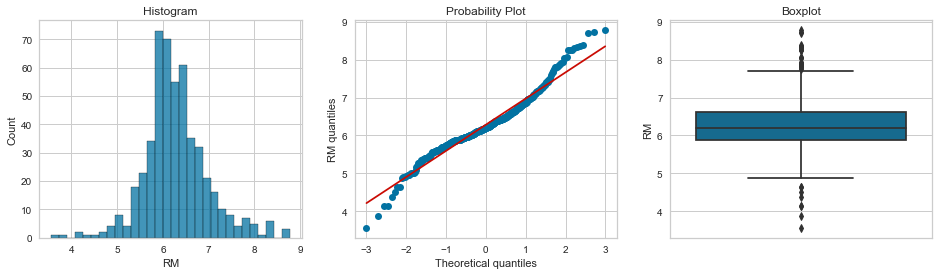

In [113]:
# Let's begin with the variable RM from the
# boston house dataset.

# RM is the average number of rooms per dwelling.

diagnostic_plots(boston, 'RM')

From the histogram and the Q-Q plot, we see that the variable RM shows roughly a Gaussian distribution. In the boxplot, we see some outliers, that is, the dots outside of the whiskers at both sides of the distribution.

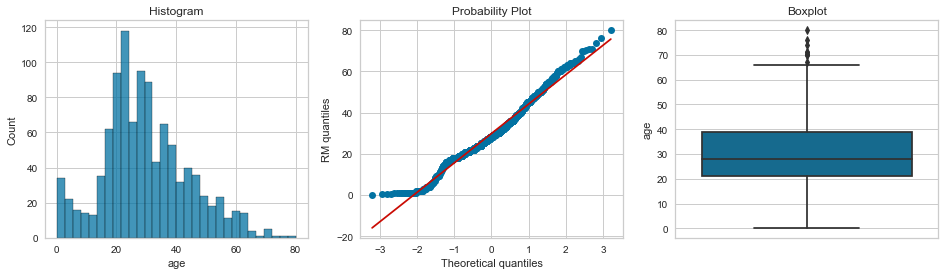

In [114]:
# Let's inspect the variable Age from the Titanic.

diagnostic_plots(titanic, 'age')

From the histogram and the Q-Q plot, we see that the variable approximates a Gaussian distribution. There is a deviation from the distribution towards the smaller values of age. In the boxplot, we can see some outliers, the dots outside of the whiskers at the top.

### Skewed variables

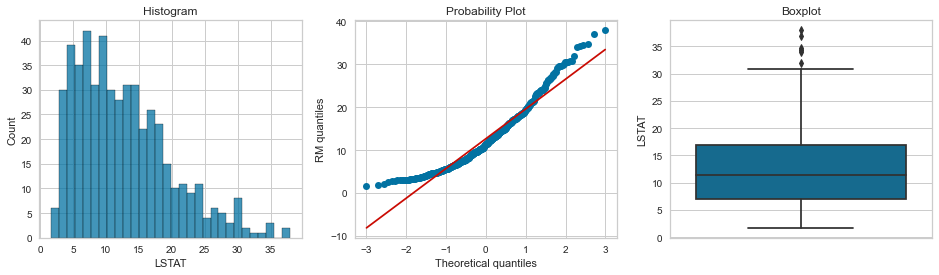

In [115]:
# Variable LSTAT from the boston house prices dataset.
# LSTAT is the % lower status of the population.

diagnostic_plots(boston, 'LSTAT')

LSTAT is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution.

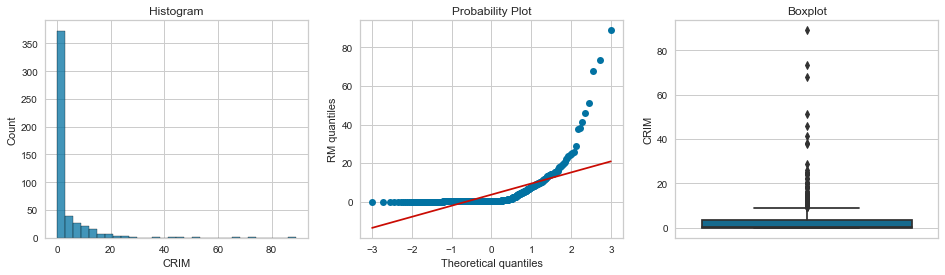

In [116]:
# Variable CRIM from the boston house prices dataset.
# CRIM is the per capita crime rate by town.

diagnostic_plots(boston, 'CRIM')

CRIM is heavily skewed, with a tail to the right. According to the boxplot, there are a few outliers at the right end of the distribution.

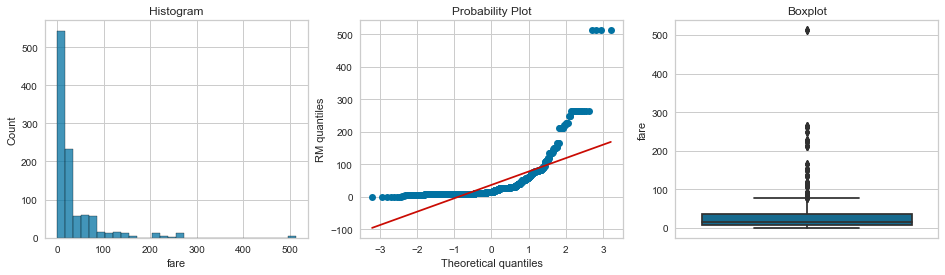

In [117]:
# Variable Fare from the Titanic dataset.
# Fare is the ticket price.

diagnostic_plots(titanic, 'fare')

Fare is also highly skewed, and shows some unusual values at the right end of its distribution.

In the next cells, we will identify outliers using the mean and the standard deviation for the variables RM and Age from the boston and titanic datasets, respectively. Then we will use the inter-quantile range to identify outliers for the variables LSTAT, CRIM and Fare from the boston and titanic datasets.

## Outlier detection

### Normally distributed variables

In [118]:
# Function to find upper and lower boundaries
# for normally distributed variables.


def find_normal_boundaries(df, variable):

    # Calculate the boundaries
    # for a Gaussian distribution.

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [119]:
# calculate boundaries for RM

upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597748, 4.176782957105809)

Values bigger than 8.4 or smaller than 4.2 occur very rarely in RM. Therefore, we can consider them outliers.

In [120]:
# Inspect the number and percentage of outliers in RM.

print('total number of houses: {}'.format(len(boston)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('% left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary]) / len(boston)))

total number of houses: 506
houses with more than 8.4 rooms (right end outliers): 4
houses with less than 4.2 rooms (left end outliers: 4

% right end outliers: 0.007905138339920948
% left end outliers: 0.007905138339920948


Using Extreme Value Analysis we identified outliers at both ends of the distribution of RM. The percentage of outliers is small (1.4% considering the 2 tails together).

Let's move on to Age from the titanic dataset.

In [121]:
# Calculate boundaries for Age.

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.01943709155127, -13.315768766192416)

The upper boundary is 73 years, which means that passengers older than 73 were rare in the titanic. The lower boundary is negative. Because negative age does not exist, it only makes sense to look for outliers using the upper boundary.

In [122]:
# Let's look at the number and percentage of outliers.

print('total passengers: {}'.format(len(titanic)))

print('passengers older than 73: {}'.format(
    len(titanic[titanic['age'] > upper_boundary])))
print()
print('% of passengers older than 73: {}'.format(
    len(titanic[titanic['age'] > upper_boundary]) / len(titanic)))

total passengers: 1045
passengers older than 73: 3

% of passengers older than 73: 0.0028708133971291866


There were 3 passengers older than 73 on the titanic.

### Skewed variables

In [123]:
# Function to find upper and lower boundaries
# for skewed variables.


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries
    # for skewed distributions

    # The parameter "distance" gives us the option to
    # estimate 1.5 times or 3 times the IQR when defining
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [124]:
# Find outliers with the IQR proximity rule.
# Here we use, IQR * 1.5, the standard metric.

# For LSTAT in the boston house prices dataset.

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [125]:
# Let's look at the number and percentage of outliers
# for LSTAT.

print('total houses: {}'.format(len(boston)))

print('houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()
print('% houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

total houses: 506
houses with LSTAT bigger than 32: 7

% houses with LSTAT bigger than 32: 0.01383399209486166


The upper boundary is ~32. The lower boundary is negative. However, the variable LSTAT does not take negative values. Thus, outliers in LSTAT will only be found beyond the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers were only found at the right tail of LSTAT's distribution.

We observe 7 houses, 1.3 % of the dataset, with extremely high values for LSTAT.

In [126]:
# Find outliers with the IQR.
# Here, we use:  IQR * 3, I look for extremely high values.

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [127]:
# Let's look at the number and percentage of outliers
# for CRIM.

print('total houses: {}'.format(len(boston)))

print('houses with CRIM bigger than 14: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary])))
print()
print('% houses with CRIM bigger than 14s: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary]) / len(boston)))

total houses: 506
houses with CRIM bigger than 14: 30

% houses with CRIM bigger than 14s: 0.05928853754940711


When using the 3  times the inter-quartile range to find outliers, we find that ~6% of the houses show unusually high crime rate areas. For CRIM as well, the lower boundary is negative, so it only makes sense to use the upper boundary to find outliers, as the variable takes only positive values. This coincides with what we observed in CRIM's boxplot earlier in this notebook.

In [128]:
# Finally, identify outliers in Fare. 
# I will look again for extreme values
# using IQR * 3.

upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
upper_boundary, lower_boundary

(117.85, -74.3)

In [129]:
# Let's look at the number and percentage of passengers
# who paid extremely high Fares.

print('total passengers: {}'.format(len(titanic)))

print('passengers who paid more than 117: {}'.format(
    len(titanic[titanic['fare'] > upper_boundary])))
print()
print('% passengers who paid more than 117: {}'.format(
    len(titanic[titanic['fare'] > upper_boundary])/len(titanic)))

total passengers: 1045
passengers who paid more than 117: 67

% passengers who paid more than 117: 0.06411483253588517


For Fare, as well as for all the other variables in this notebook which show a tail to the right, the lower boundary is negative. So we will use the upper boundary to find outliers. We observe that 6% of the values of the dataset fall above the boundary. 

<hr/>

# Variable magnitude


## Does the magnitude matter?

In linear regression models, the scale of variables used to estimate the output matters. Linear models predict y as follows:  **y = w x + b**, where the regression coefficient w represents the expected change in y for a unit change in x (the predictor). Thus, the magnitude of w is partly determined by the magnitude of the units being used for x. If x is a distance variable, just changing the scale from kilometers to miles will cause a change in the magnitude of the coefficient.

In addition, when we estimate the outcome y using multiple predictors x1, x2,... , xn, variables with greater numeric ranges dominate those with smaller numeric ranges.

Gradient descent converges faster when all the predictors (x1 to xn) are in a similar scale. Thus, having features in a similar scale is useful for neural networks.

In support vector machines, feature scaling can decrease the time it takes to find the support vectors.

Finally, methods using Euclidean distances or distances in general are also affected by the magnitude of the features, as Euclidean distance is sensitive to variations in the magnitude or scale of the predictors. Therefore, feature scaling is required for methods that utilise distance calculations like k-nearest neighbours (KNN) and k-means clustering.

In summary:

### Magnitude matters because:

- The regression coefficient is directly influenced by the scale of the variable.

- Variables with a larger magnitude dominate those with a smaller magnitude.

- Gradient descent converges faster when features are on similar scales.

- Feature scaling helps decrease the time it takes to find support vectors for SVMs.

- Euclidean distances are sensitive to feature magnitude.

### The machine learning models affected by the feature magnitude are:

- Linear and Logistic Regression.

- Neural Networks.

- Support Vector Machines (SVMs).

- KNN.

- K-means clustering.

- Linear Discriminant Analysis (LDA).

- Principal Component Analysis (PCA).

### Machine learning models insensitive to feature magnitude are the ones based on trees:

- Classification and Regression Trees.

- Random Forests (RF.

- Gradient Boosted Trees.

In [130]:
import pandas as pd
import numpy as np

# import several machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to evaluate performance and separate into
# train and test set
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

### Load data

In [131]:
# Load numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv',
                   usecols=['pclass', 'age', 'fare', 'survived'])
data.head()

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500


In [132]:
# Let's have a look at the variables' values and
# compare the feature magnitudes.

data.describe()

,pclass,survived,age,fare
count,1309.000000,1309.000000,1046.000000,1308.000000
mean,2.294882,0.381971,29.881135,33.295479
std,0.837836,0.486055,14.413500,51.758668
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,21.000000,7.895800
50%,3.000000,0.000000,28.000000,14.454200
75%,3.000000,1.000000,39.000000,31.275000
max,3.000000,1.000000,80.000000,512.329200


The variable Fare varies between 0 and 512. The variable Age varies between 0 and 80. The variable Class varies between 1 and 3. So the variables have different magnitude.

In [133]:
# Let's calculate the range.

for col in ['pclass', 'age', 'fare']:
    print(col, 'range: ', data[col].max() - data[col].min())

pclass range:  2
age range:  79.8333
fare range:  512.3292


The range of values of each variable is different.

In [134]:
# Let's separate the data into training and testing sets.

# The titanic dataset contains missing information.
# For this demo, I will fill in those values with 0s.

X_train, X_test, y_train, y_test = train_test_split(
    data[['pclass', 'age', 'fare']].fillna(0),
    data.survived,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

## Feature Scaling

For this demonstration, I will scale the features between 0 and 1, using the [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)from Scikit-learn.

The transformation is given by:

X_rescaled = X - X.min() / ( X.max() - X.min() )

And to transform the re-scaled features back to their original magnitude:

X = X_rescaled * (max - min) + min

**There is a section dedicated  to feature scaling later in the course, where I will explain this and other scaling techniques in more detail**. For now, let's carry on with the demonstration.

In [135]:
# Scale the features between 0 and 1.

# The scaler.
scaler = MinMaxScaler()

# Fit the scaler.
scaler.fit(X_train)

# Re-scale the datasets.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
# Let's have a look at the scaled training set.

print('Mean: ', X_train_scaled.mean(axis=0))
print('Standard Deviation: ', X_train_scaled.std(axis=0))
print('Minimum value: ', X_train_scaled.min(axis=0))
print('Maximum value: ', X_train_scaled.max(axis=0))

Mean:  [0.64628821 0.33048359 0.06349833]
Standard Deviation:  [0.42105785 0.23332045 0.09250036]
Minimum value:  [0. 0. 0.]
Maximum value:  [1. 1. 1.]


The maximum values of all features is 1, and the minimum value is 0, as expected.

### Logistic Regression

Let's evaluate the effect of feature scaling in a logistic regression.

In [137]:
# Model trained with unscaled variables.

# The model.
logit = LogisticRegression(
    random_state=44,
    C=1000,  # c big to avoid regularization
    solver='lbfgs')

# Train the model.
logit.fit(X_train, y_train)

# Evaluate performance.
print('Train set')
pred = logit.predict_proba(X_train)
print('Logistic Regression roc-auc: {}'.format(
    roc_auc_score(y_train, pred[:, 1])))
print('Test set')
pred = logit.predict_proba(X_test)
print('Logistic Regression roc-auc: {}'.format(
    roc_auc_score(y_test, pred[:, 1])))

Train set
Logistic Regression roc-auc: 0.6793181006244372
Test set
Logistic Regression roc-auc: 0.7175488081411426


In [138]:
# Let's look at the coefficients.
logit.coef_

array([[-0.71428242, -0.00923013,  0.00425235]])

In [139]:
# Model trained with scaled variables.

# The model.
logit = LogisticRegression(
    random_state=44,
    C=1000,  # c big to avoid regularization
    solver='lbfgs')

# Train the model using the re-scaled data.
logit.fit(X_train_scaled, y_train)

# Evaluate performance.
print('Train set')
pred = logit.predict_proba(X_train_scaled)
print('Logistic Regression roc-auc: {}'.format(
    roc_auc_score(y_train, pred[:, 1])))
print('Test set')
pred = logit.predict_proba(X_test_scaled)
print('Logistic Regression roc-auc: {}'.format(
    roc_auc_score(y_test, pred[:, 1])))

Train set
Logistic Regression roc-auc: 0.6793281640744896
Test set
Logistic Regression roc-auc: 0.7175488081411426


In [140]:
# Let's look at the coefficients.

logit.coef_

array([[-1.42875872, -0.68293349,  2.17646757]])

The performance of logistic regression did not change when using the datasets with the features scaled (compare ROC-AUC values for train and test set for models with and without feature scaling). 

However, when looking at the coefficients, we do see a big difference in the values. This is because the magnitude of the variable affects the coefficients. 

After scaling, all 3 variables have similar effect (coefficient) on survival, whereas before scaling, we would be inclined to think that Class was driving the survival outcome.

### Support Vector Machines

In [141]:
# Model trained unscaled variables.

# The model.
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

# Train the model.
SVM_model.fit(X_train, y_train)

# Evaluate performance.
print('Train set')
pred = SVM_model.predict_proba(X_train)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Test set')
pred = SVM_model.predict_proba(X_test)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
SVM roc-auc: 0.882393490960506
Test set
SVM roc-auc: 0.6617581992146452


In [142]:
# Model trained with scaled variables.

# The model.
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

# Train the model.
SVM_model.fit(X_train_scaled, y_train)

# Evaluate performance.
print('Train set')
pred = SVM_model.predict_proba(X_train_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Test set')
pred = SVM_model.predict_proba(X_test_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
SVM roc-auc: 0.6780802962679695
Test set
SVM roc-auc: 0.6841435761296388


Scaling the features improved the performance of the support vector machine. After feature scaling, the model is no longer over-fitting to the training set (compare the ROC-AUC of 0.881 for the model on unscaled features vs. 0.68). In addition, the ROC-AUC for the testing set increased as well (0.66 vs 0.68).

### K-Nearest Neighbours

In [143]:
# Model trained with unscaled features.

# The model.
KNN = KNeighborsClassifier(n_neighbors=5)

# Train the model.
KNN.fit(X_train, y_train)

# Evaluate performance.
print('Train set')
pred = KNN.predict_proba(X_train)
print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = KNN.predict_proba(X_test)
print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
KNN roc-auc: 0.8149809549207755
Test set
KNN roc-auc: 0.6865632431834522


In [144]:
# Model trained with scaled data.

# Rhe model.
KNN = KNeighborsClassifier(n_neighbors=5)

# Train the model.
KNN.fit(X_train_scaled, y_train)

# Evaluate performance.
print('Train set')
pred = KNN.predict_proba(X_train_scaled)
print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = KNN.predict_proba(X_test_scaled)
print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
KNN roc-auc: 0.8260281072159968
Test set
KNN roc-auc: 0.7206183286322659


Feature scaling improved the performance of the KNN model. The model trained using scaled features shows better generalisation, that is, higher ROC-AUC for the testing set (0.72 vs. 0.69).

Both KNN methods overfit to the train set.Thus, we would need to change the parameters of the model or use fewer features to try and decrease over-fitting, which exceeds the purpose of this demonstration.

### Random Forests

In [145]:
# Model trained with unscaled features.

# The model.
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train, y_train)

# Evaluate performance.
print('Train set')
pred = rf.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Test set')
pred = rf.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
Random Forests roc-auc: 0.9866810238554083
Test set
Random Forests roc-auc: 0.7326751838946961


In [146]:
# Model trained with  scaled features

# The model.
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train_scaled, y_train)

# Evaluate performance.
print('Train set')
pred = rf.predict_proba(X_train_scaled)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_test_scaled)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.9867917218059866
Test set
Random Forests roc-auc: 0.7312510370001659


As expected, random forests show no change in performance regardless of whether they are trained on a dataset with scaled or unscaled features. 

This model, in particular, is over-fitting to the training set. So we need to do some work to remove the over-fitting. That exceeds the scope of this demonstration.

### Adaboost

In [148]:
# Train Adaboost on non-scaled features.

# Adaboost
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train, y_train)

# Evaluate model performance.
print('Train set')
pred = ada.predict_proba(X_train)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = ada.predict_proba(X_test)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
AdaBoost roc-auc: 0.7970629821021541
Test set
AdaBoost roc-auc: 0.7473867595818815


In [149]:
# Train Adaboost on scaled features.

# Adaboost.
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train_scaled, y_train)

# Evaluate model performance.
print('Train set')
pred = ada.predict_proba(X_train_scaled)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = ada.predict_proba(X_test_scaled)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
AdaBoost roc-auc: 0.7970629821021541
Test set
AdaBoost roc-auc: 0.7475250262706707


As expected, AdaBoost shows no change in performance regardless of whether it is trained on a dataset with scaled or unscaled features.